In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Downloads/Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
latest_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
latest_date

('2017-08-23',)

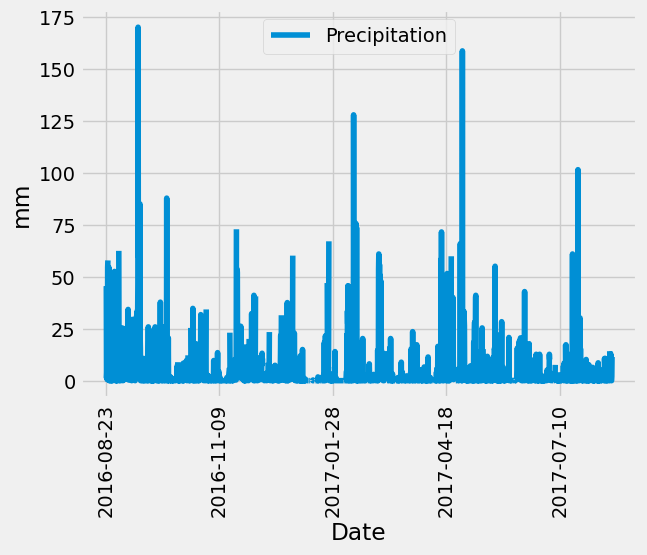

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
import datetime as dt
# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(measurement.date,measurement.prcp).filter(measurement.date >= '2016-08-23')

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_data,columns=["Date","Precipitation"])
# Set index and sort the dataframe by date
prcp_df = prcp_df.set_index("Date").sort_values("Date",ascending=True)
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(kind='line',xlabel='Date',ylabel='mm')
plt.legend(loc="upper center")
plt.xticks(rotation=90)
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
station_data = session.query(func.count(station.id)).all()
station_data

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station,func.count(measurement.station))\
                                .group_by(measurement.station)\
                                .order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp = session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs))\
                    .filter(measurement.station == 'USC00519281').all()
temp

[(12.2, 29.4, 22.03582251082252)]

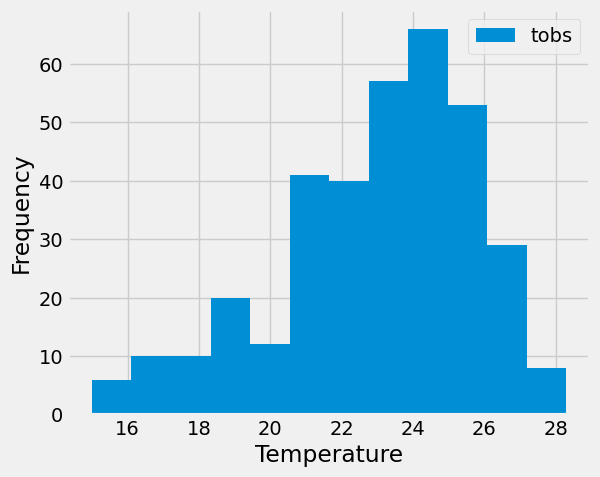

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs = session.query(measurement.date, measurement.tobs).filter(measurement.date >= '2016-08-23')\
                        .filter(measurement.station == 'USC00519281').all()
temp_df = pd.DataFrame(temp_obs,columns=['Date','tobs']).set_index('Date')
temp_df['tobs'].plot(kind='hist',bins=12,figsize=(6,5))
plt.xlabel('Temperature')
plt.legend(loc="upper right")
plt.show()

# Close Session

In [16]:
# Close Session
session.close()